<h2 style="font-weight: bold">House Prices Competition</h2>

<h4>This is my second published notebook on Kaggle, So yeah no wonder it's about the House Prices Competition 😄😄<br><br>I will be doing a simple then advanced EDA, Data Visualization and Pre-Processing. I also will test different approaches and regression techniques to improve my score.<br></h4>

* <h5 style="font-weight: 700">Your feedback is very welcome</h5>
* <h5 style="font-weight: 700">If you find this notebook useful, please don't forget to upvote it!</h5>


In [1]:
# Required packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#  **Exploratory Data Analysis**

In [4]:
# Getting to know data
print(f"Training Set :\n Number of rows : {train.shape[0]}, Number of Columns : {train.shape[1]}")
print(f"Test Set :\n Number of rows : {test.shape[0]}, Number of Columns : {test.shape[1]}")

Training Set :
 Number of rows : 1460, Number of Columns : 81
Test Set :
 Number of rows : 1459, Number of Columns : 80


In [5]:
# extract numeric data
num_cols = train.loc[:,train.dtypes != 'object'].drop(['Id'], axis=1).columns
num_train = train[num_cols]
# extract categorical data
cat_cols = train.loc[:,train.dtypes == 'object'].columns
cat_train = train[cat_cols]

print("Total Numerical Cols : ", len(num_cols))
print("Total Categorical Cols : ", len(cat_cols))

Total Numerical Cols :  37
Total Categorical Cols :  43


In [6]:
# summary of numerical variable
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# summary of categorial variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# let's clean visualizations :)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'SalePrice distribution')

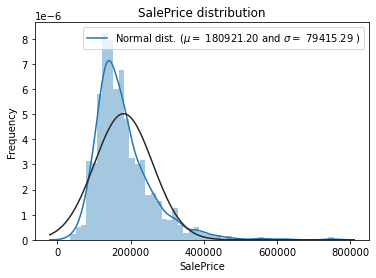

In [9]:
# Let's take a look at the distribution of the SalePrice 
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Text(0.5, 1.0, 'SalePrice distribution')

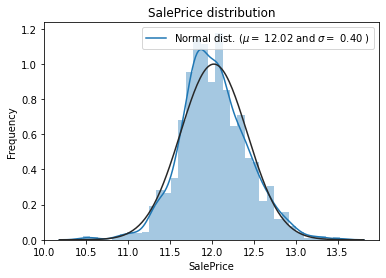

In [10]:
price = np.log1p(train["SalePrice"])
 
sns.distplot(price , fit=norm);
(mu, sigma) = norm.fit(price)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

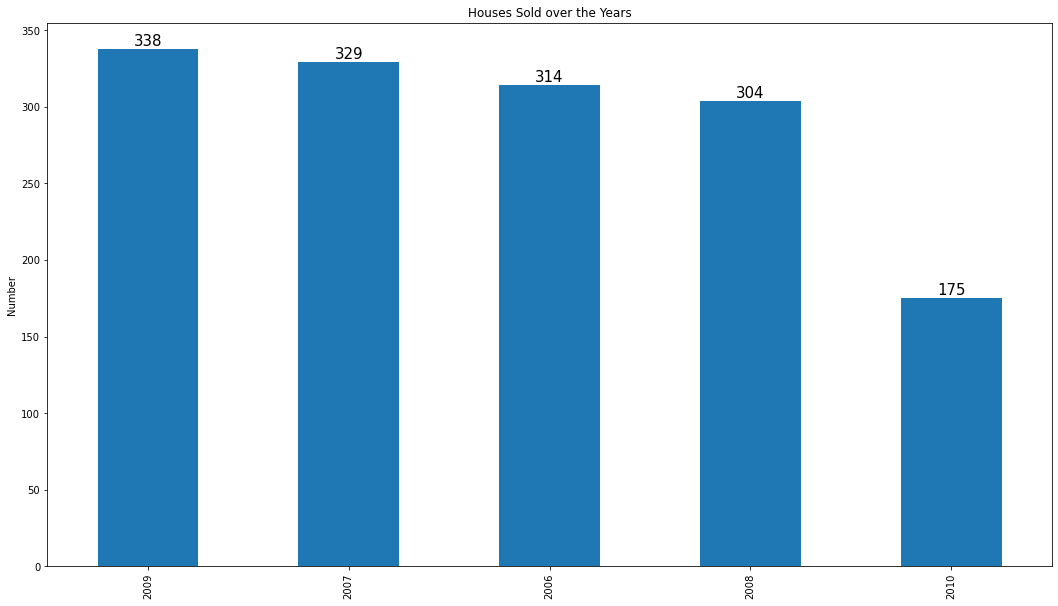

In [11]:
# common sales' years
plt.figure(figsize=(18,10))
plots = train["YrSold"].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Houses Sold over the Years")
plt.ylabel("Number")
plt.show()

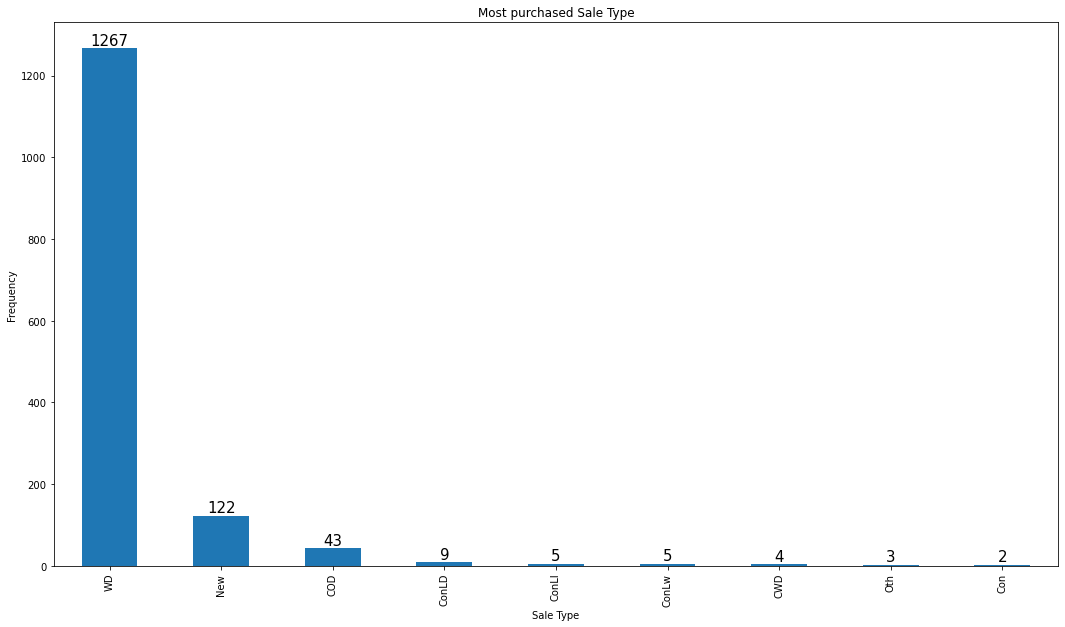

In [12]:
# common purchases' types
plt.figure(figsize=(18,10))
plots = train["SaleType"].value_counts().plot(kind="bar")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Most purchased Sale Type")
plt.ylabel("Frequency")
plt.xlabel("Sale Type")
plt.show()

In [13]:
### Feature importances

In [14]:
# fill nan with "NULL"
tmp_df = train.copy()
tmp_df[cat_cols] = tmp_df[cat_cols].fillna('NULL')
# label encoding
for col in cat_cols:
    le = LabelEncoder()
    le.fit(tmp_df[col])
    tmp_df[col] = le.transform(tmp_df[col])
# train data
X_train = tmp_df.drop(['SalePrice', 'Id'], axis=1)
y_train = tmp_df['SalePrice']
lgb_train = lgb.Dataset(X_train, y_train)
params = {'objective': 'regression', 'metric': 'rmse'}
gbm = lgb.train(params, lgb_train)
# create DataFrame
cols = train.columns.drop(['Id', 'SalePrice'])
feat_importances = pd.DataFrame({'importance': gbm.feature_importance()}, index=X_train.columns).sort_values('importance', ascending=False)
feat_importances['dtype'] = ['numeric' if feat in num_cols else 'categorical' for feat in cols]
feat_importances.head()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3391
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 180921.195890


,importance,dtype
GrLivArea,258,numeric
TotalBsmtSF,183,categorical
LotArea,181,numeric
BsmtFinSF1,165,numeric
GarageArea,150,categorical


### Numeric features

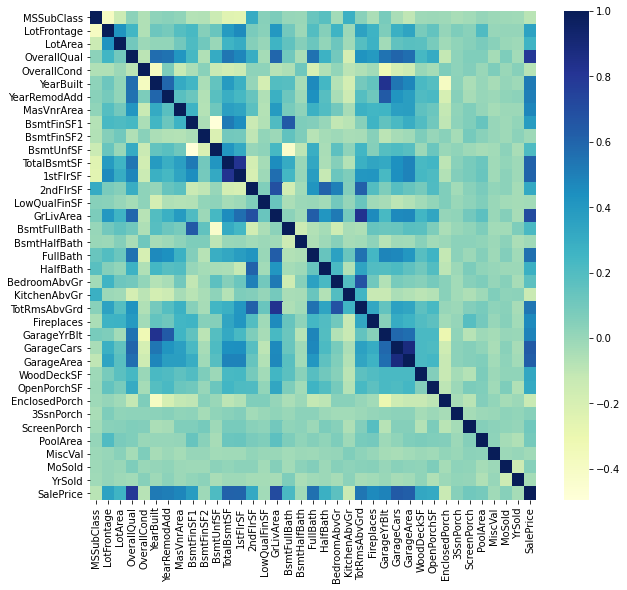

In [15]:
# correlation between numerical values
plt.figure(figsize=(10, 9))
sns.heatmap(train.drop('Id', axis=1).corr(), cmap='YlGnBu');

Text(0, 0.5, 'features')

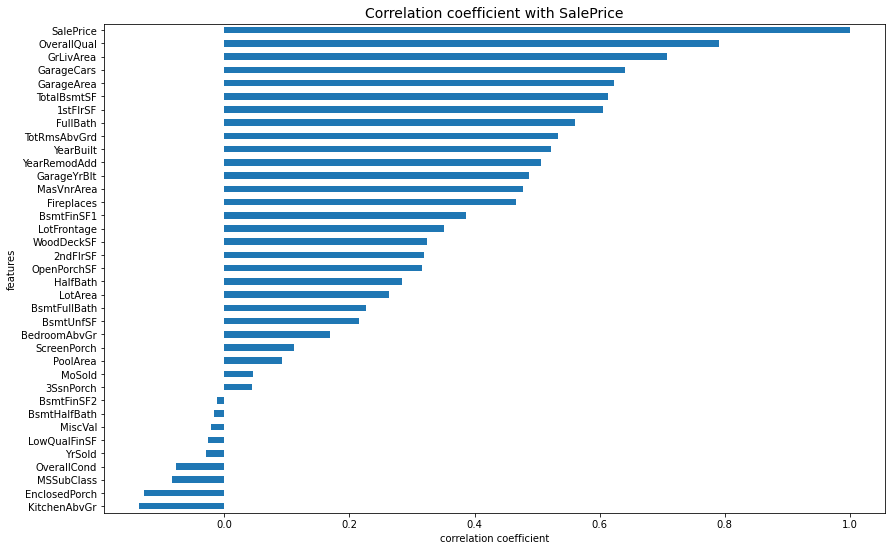

In [16]:
# correlation coefficient with SalePrice
ax = num_train.corr()['SalePrice'].sort_values().plot(kind='barh', figsize=(14,9))
ax.set_title('Correlation coefficient with SalePrice', fontsize=14)
ax.set_xlabel('correlation coefficient')
ax.set_ylabel('features')

Text(0, 0.5, 'count')

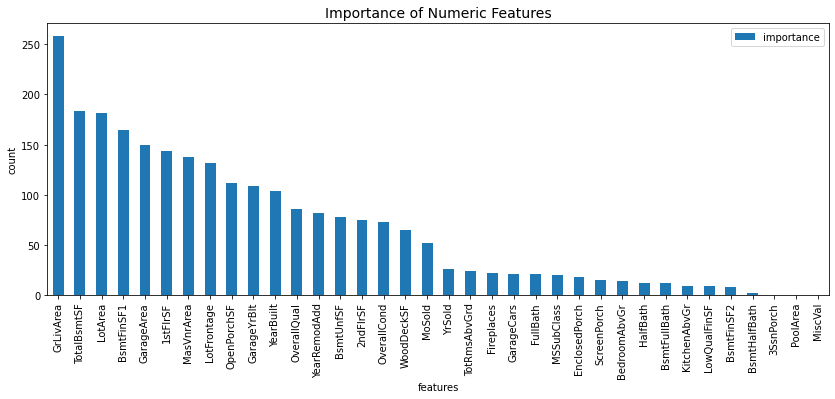

In [17]:
# plot importance of numeric features
num_feat_importances = feat_importances.loc[num_cols[:-1]].sort_values('importance', ascending=False)
ax = num_feat_importances.plot.bar(figsize=(14,5))
ax.set_title('Importance of Numeric Features', fontsize=14)
ax.set_xlabel('features')
ax.set_ylabel('count')

#  **Preprocessing**

In [18]:
# cross validation
def rmsle_cv(model):
    kf = KFold(
        n_splits=5,
        shuffle=True,
        random_state=42).get_n_splits(train_data)

    rmse = np.sqrt(-cross_val_score(
        model,
        train_data,
        price,
        scoring="neg_mean_squared_error",
        cv = kf)
    )
    return rmse

In [19]:
# Numerical columns  (int64/float64)
def get_numerical_cols(threshold=15):
    num_cols =[]
    num_df = train.select_dtypes(exclude='O')
    for num_col in num_df.columns:
        if num_col != 'SalePrice':
            if train[num_col].nunique() > 15:
                num_cols.append(num_col)
    return num_cols

In [20]:
# Category columns
def get_cat_cols(type='O', threshold=15):
    cat = []

    # Feature Selection
    for col in train.columns:
        if train[col].dtype == type:
            if train[col].nunique()<=threshold:
                cat.append(col)
    return cat

In [21]:
# if a column has many missing fields then it has no use 
field_missing = train['MiscFeature'].isna().sum()
print(f'Missing field in MiscFeature column {field_missing} ({field_missing/len(train):.2f}%)')

Missing field in MiscFeature column 1406 (0.96%)


In [22]:
def feature_selection_util(type='O', cat_threshold=15, missing_threshold=100, is_cat=True):
    features=[]
    columns = get_cat_cols(type=type, threshold=cat_threshold) if is_cat else get_numerical_cols(threshold=cat_threshold)
    for feature in columns:
        if train[feature].isna().sum() <100:
            features.append(feature)
    return features

In [23]:
# string category 
str_cat_features = feature_selection_util()
str_cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                      ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# integer category 
int_cat_features = feature_selection_util(type='int64')
int_cat_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                      ('ohe', OneHotEncoder(handle_unknown='ignore'))])

# numerical columns 
numerical_features = feature_selection_util(is_cat=False)
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                        ('scale',StandardScaler())])


# transformation
preprocessing = ColumnTransformer(transformers=[('str_cat',str_cat_transformer,str_cat_features),
                                                ('int_cat',int_cat_transformer, int_cat_features),
                                                ('num_col', numerical_transformer, numerical_features)])


#  **Training and Predicting**

In [24]:
def cross_validate(model,scoring='neg_root_mean_squared_error'):
    # training features and lables
    X = train.drop(columns=['SalePrice'])
    y = train['SalePrice'] 
    # cross validation score
    cv_score = cross_val_score(model, X, y, scoring=scoring)
    return cv_score.mean()

In [25]:
# pipeline combining preprocessing step and modeling
model = RandomForestRegressor(random_state=42)
model_pipe = Pipeline(steps=[('preprocessing', preprocessing),
                       ('model', model)])
mean_cv_score = cross_validate(model_pipe)

print(mean_cv_score)

-30567.65582074594


In [26]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice'] 

# train the model
model_pipe.fit(X,y)

# make predictions
predictions = model_pipe.predict(test)

In [27]:
output = pd.DataFrame({'Id':test['Id'], 'SalePrice':predictions})
output = output.to_csv('submission.csv',index=False)
print('done')

done
